# Problem Statement
---



This project examines a housing dataset from the city of Ames in Iowa, USA , Source: [link]('https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data'). Predictors of housing prices can vary from many factors. There are many homeowners who assumes that the older the property, the higher it sells. But to their dismay, they don't get the return on investment especially when selling the older property at it's original state. Homebuyers are also not sure what features greatly influence the housing price in Ames. 

As a data analyst, I would like to show new real estate agencies on how using predicting models can help them to identify features that can influence the price of the house and they could use it accordingly to advise their clients.

To answer these questions, I use supervised learning method with different linear regression models to the housing data to determine the features that are most influential on house price positively and negatively. The performance of the models will be evaluated using the R2 metric and RMSE.

The goal of this project is to concerns, specifically:

- what are the top 5 features add the most value to a home?
- which feature hurt home values most?

# Importing
---


In [80]:
#Import libraries 
 
import scipy.stats as stats
import numpy as np
import pandas as pd

#sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

# visual
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Functions
---





In [81]:
#replace empty and slash to _ for cleaning coluumns

def cleancol(columns):
    c = []
    for i in columns:
        i = i.lower().replace(' ', '_').replace('/','_')
        c.append(i)
    return c

# Data cleaning
---



In [82]:
# import data
df_train = pd.read_csv('data/train.csv')
df_test= pd.read_csv('data/test.csv')

In [83]:
print(df_train.shape)
print(df_test.shape)
#test have one lesser column as target variable is SalePrice. train have 81, test have 80 columns

(2051, 81)
(878, 80)


*From observation above, SalePrice column is not in test.csv as the target variable is SalePrice from the model*

In [84]:
list(df_test.columns) == list(df_train.drop('SalePrice', axis =1).columns)
# check if test columns same as train

True

In [85]:
df_train.columns = cleancol(df_train.columns)
df_test.columns = cleancol(df_test.columns)
# clean the columns with functions created above

In [86]:
df_train.columns #check if change accordingly

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [87]:
df_train.info()
#info of df_train as an overview to see the types of column and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

1. Convert those NA columns identified in object type to None
2. Convert those NA columns identified as Float to 0

In [88]:
df_train.isna().sum().sort_values(ascending=False).head(30)
#this are the total NAN columns found
#pool_q,misc_feature,alley,fence,fireplae_qu have a lot of empty null values, more than 50%!

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
mo_sold              0
sale_type            0
full_bath            0
half_bath            0
dtype: int64

In [89]:
convertNAtoNone = ['alley','fireplace_qu','bsmt_qual','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','fireplace_qu',
                 'garage_type','garage_finish', 'garage_qual','garage_cond', 'pool_qc', 'fence','misc_feature','bsmt_cond']
#this are the object columns identified in the data dictionary where NA = No feature (column name) 

In [90]:
df_train[convertNAtoNone].isna().sum()
#sum the null values of those NA = no features

alley             1911
fireplace_qu      1000
bsmt_qual           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_type_2      56
fireplace_qu      1000
garage_type        113
garage_finish      114
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
bsmt_cond           55
dtype: int64

In [91]:
df_train[convertNAtoNone] = df_train[convertNAtoNone].replace(np.nan,'None')
#replacing the null values to None as they do not have such feature

In [92]:
df_train[convertNAtoNone].isna().sum()
#should be 0 as replace all the identified ones with None

alley             0
fireplace_qu      0
bsmt_qual         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_type_2    0
fireplace_qu      0
garage_type       0
garage_finish     0
garage_qual       0
garage_cond       0
pool_qc           0
fence             0
misc_feature      0
bsmt_cond         0
dtype: int64

In [93]:
NA_Int= df_train.select_dtypes(include=['int64']).columns
#if there are nan values, to replace as 0 which means there is no such feature such as 0 lot area = no lot area

In [94]:
df_train[NA_Int].isna().sum()

id                 0
pid                0
ms_subclass        0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod_add     0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
yr_sold            0
saleprice          0
dtype: int64

No null value for int64 dtypes, proceed similarly to float64 columns

In [95]:
NA_Float = df_train.select_dtypes(include=['float64']).columns
#this are the float columns identified in the data dictionary where NA = No feature (column name) 

In [96]:
df_train[NA_Float].isna().sum()

lot_frontage      330
mas_vnr_area       22
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
garage_yr_blt     114
garage_cars         1
garage_area         1
dtype: int64

In [97]:
df_train[NA_Float] = df_train[NA_Float].replace(np.nan,0)
#if there are nan values, to replace as 0 which means there is no such feature such as 0 lot frontage = no lot frontage

In [98]:
df_train[NA_Float].isna().sum()

lot_frontage      0
mas_vnr_area      0
bsmtfin_sf_1      0
bsmtfin_sf_2      0
bsmt_unf_sf       0
total_bsmt_sf     0
bsmt_full_bath    0
bsmt_half_bath    0
garage_yr_blt     0
garage_cars       0
garage_area       0
dtype: int64

In [99]:
df_train.isna().sum()[df_train.isna().sum() !=0].sort_values(ascending=False)
# output and sum the na for df_columns where sum of na != 0 only

mas_vnr_type    22
dtype: int64

In [100]:
df_train['mas_vnr_type'].unique()
#check the unique values of mas_vnr_type

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [101]:
df_train['mas_vnr_type'] = df_train['mas_vnr_type'].replace(np.nan, 'None')
df_train['mas_vnr_type'].value_counts()
#since there is already a None value, assuming no value means None. replacing it to None

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [102]:
df_train['mas_vnr_type'].unique()
# no more null columns

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [103]:
df_train.isna().sum()[df_train.isna().sum() !=0].sort_values(ascending=False)
#check again if there is any null values in df_train 

Series([], dtype: int64)

1. Columns that have ordinal values identified to convert to 1-5
2. Columns that are in Y/N change to binary 
3. Add property_age and remodel_age column 
4. Remove id as they are not useful and related

In [104]:
ratingz ={
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'None': 0 } #ordinal values to map to

In [105]:
rating_list = ['bsmt_cond','bsmt_qual', 'exter_qual','exter_cond','pool_qc', 'garage_cond','heating_qc','kitchen_qual',
               'garage_qual', 'fireplace_qu']
#map ordinal columns that have similar ratings to ratingz dict

In [106]:
for i in rating_list:
    df_train[i] = df_train[i].map(ratingz)   
#map the identified columns to the ratingz dict in df_train 

In [107]:
df_train[rating_list].head()
#check the values to see if have converted

,bsmt_cond,bsmt_qual,exter_qual,exter_cond,pool_qc,garage_cond,heating_qc,kitchen_qual,garage_qual,fireplace_qu
0,3,3,4,3,0,3,5,4,3,0
1,3,4,4,3,0,3,5,4,3,3
2,3,3,3,4,0,3,3,4,3,0
3,3,4,3,3,0,3,4,3,3,0
4,4,2,3,3,0,3,3,3,3,0


In [108]:
df_train['paved_drive'] = df_train['paved_drive'].map({'Y':1 , 'N' : 0, 'P': 0.5}) 
#change all Y to 1 and N to 0, P to 0.5

df_train['paved_drive'].unique()

array([1. , 0. , 0.5])

In [109]:
df_train['central_air'] = df_train['central_air'].map({'Y':1 , 'N' : 0}) 
#change all Y to 1 and N to 0
df_train['central_air'].unique()

array([1, 0], dtype=int64)

On top with what was given, based on research, house buyers look at 
1. Remodelling age as buyers generally want a ready to move in houses that are freshly remodeled and updated 
2. Property age to compare to remodelling age and also older homes sometimes can get a vintage appeal

In [110]:
#calculate property age 
df_train['property_age'] = df_train['yr_sold'] - df_train['year_built']

In [111]:
#calculate remodel age
df_train['remodel_age'] = df_train['yr_sold'] - df_train['year_remod_add']

***Porch***

As there are multiple porch features and usually houses have 0 psf for porch, let's look at their unique values to see if it's true

In [112]:
porch = ['open_porch_sf', 'enclosed_porch','3ssn_porch']

Text(0.5, 1.0, 'Total values of porch values')

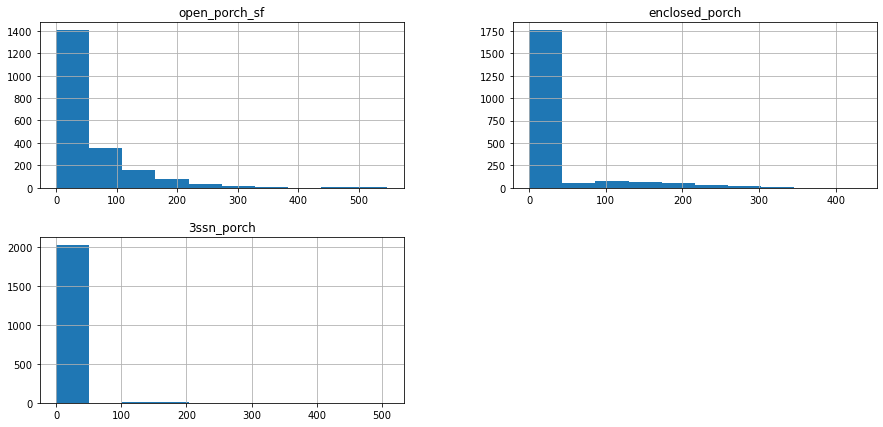

In [113]:
df_train[porch].hist(figsize=(15,7));
plt.title('Total values of porch values')

Most of the values are indeed 0 for each column. Those columns more than 0 for any porch will be combined into a single column indicating the presence of a porch.

In [114]:
df_train['porch_sf'] = df_train[['open_porch_sf', 'enclosed_porch','3ssn_porch']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
df_train = df_train.drop(columns = ['open_porch_sf', 'enclosed_porch','3ssn_porch'])
# areas >0 for any porch will be combined into a single column indicating the presence of a porch.

In [115]:
df_train['porch_sf'].value_counts()

1    1371
0     680
Name: porch_sf, dtype: int64

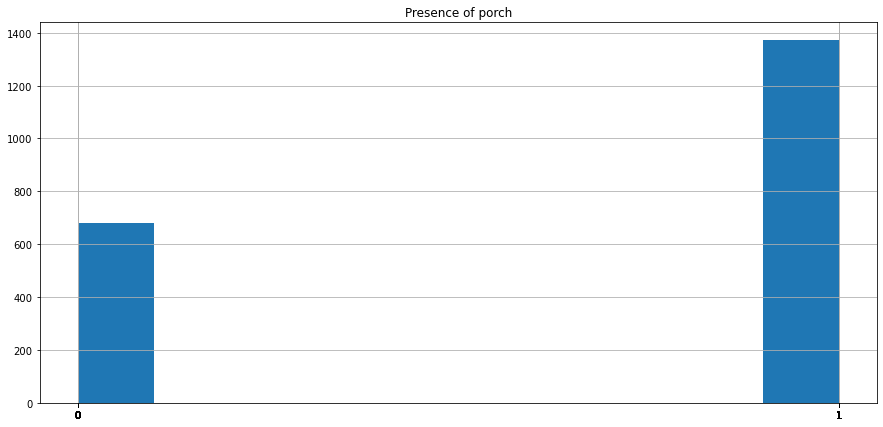

In [116]:
df_train['porch_sf'].hist(figsize=(15,7))
plt.title('Presence of porch')
plt.xticks(df_train['porch_sf']);

There are more houses with porch! 

***Garage Year and House Year Built***

Usually, garages were built the same year as the house built. Check if it's true

In [117]:
len(df_train[df_train['garage_yr_blt']==df_train['year_built']])

1564

As there are 1564 out 2051(76%!) rows are the same where garage for year built, i will remove the garage_yr_blt

In [118]:
df_train = df_train.drop(columns = ['garage_yr_blt'])

***1st_flr_sf , 2nd_flr_sf ,gr_liv_area***

There are houses that exist where there is not even a second floor. And potential buyers usually look at total ground living area and if there exist a second floor, not really the size of the second floor. 
This means that there are houses where 1st floor and ground area living area will likely be the same values.  

In [119]:
len(df_train[df_train['2nd_flr_sf']==0])
#1191 houses out of 2051(58%) with 0 2nd floor

1191

In [120]:
print(len(df_train[df_train['1st_flr_sf']== df_train['gr_liv_area']]))
#the number of houses where 1st floor = ground living area. that's 57.3%

1176


As there roughly half of the houses where 1st floor is equivalent to ground living area, i will remove the first floor. 
I will convert 2nd floor to 1 or 0 variable where 1 means Yes and 0 means No second floor.

In [121]:
df_train['2nd_flr_sf'].apply(lambda x: 1 if x > 0 else 0)

0       1
1       1
2       0
3       1
4       1
       ..
2046    0
2047    0
2048    1
2049    0
2050    1
Name: 2nd_flr_sf, Length: 2051, dtype: int64

In [122]:
df_train = df_train.drop(columns = ['1st_flr_sf'])

In [123]:
df_train = df_train.drop(columns = ['id'])
#remove id as it is not useful to indicate target saleprice since they are just serial numbers 

In [124]:
df_train.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,property_age,remodel_age,porch_sf
0,533352170,60,RL,0.0,13517,Pave,None,IR1,Lvl,AllPub,...,None,None,0,3,2010,WD,130500,34,5,1
1,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,...,None,None,0,4,2009,WD,220000,13,12,1
2,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,...,None,None,0,1,2010,WD,109000,57,3,1
3,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,...,None,None,0,4,2010,WD,174000,4,3,0
4,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,...,None,None,0,3,2010,WD,138500,110,17,1


In [125]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              2051 non-null   int64  
 1   ms_subclass      2051 non-null   int64  
 2   ms_zoning        2051 non-null   object 
 3   lot_frontage     2051 non-null   float64
 4   lot_area         2051 non-null   int64  
 5   street           2051 non-null   object 
 6   alley            2051 non-null   object 
 7   lot_shape        2051 non-null   object 
 8   land_contour     2051 non-null   object 
 9   utilities        2051 non-null   object 
 10  lot_config       2051 non-null   object 
 11  land_slope       2051 non-null   object 
 12  neighborhood     2051 non-null   object 
 13  condition_1      2051 non-null   object 
 14  condition_2      2051 non-null   object 
 15  bldg_type        2051 non-null   object 
 16  house_style      2051 non-null   object 
 17  overall_qual  

In [126]:
df_train.to_csv('data/train_new.csv', index=False)
#save new train csv

### *Repeat above steps for df_test* 

In [127]:
df_test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [128]:
df_test.isna().sum().sort_values(ascending=False).head(20)
#check the total sum of nan values of df_test

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_1     25
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_2     25
electrical          1
mas_vnr_type        1
mas_vnr_area        1
kitchen_abvgr       0
dtype: int64

In [129]:
NA_Int_test= df_test.select_dtypes(include=['int64']).columns

In [130]:
df_test[NA_Int_test].isna().sum()

id                 0
pid                0
ms_subclass        0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod_add     0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
garage_cars        0
garage_area        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
yr_sold            0
dtype: int64

no null values for int64 dtypes, proceed to object and float

In [131]:
df_test[convertNAtoNone].isna().sum()
#this are the object columns identified in the df_test where NA = No feature (column name) 

alley             820
fireplace_qu      422
bsmt_qual          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
fireplace_qu      422
garage_type        44
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           874
fence             706
misc_feature      837
bsmt_cond          25
dtype: int64

In [132]:
df_test[convertNAtoNone] = df_test[convertNAtoNone].replace(np.nan,'None')
#replace them to None 

In [133]:
df_test[convertNAtoNone].isna().sum()
#should be 0 as replace to None

alley             0
fireplace_qu      0
bsmt_qual         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_type_2    0
fireplace_qu      0
garage_type       0
garage_finish     0
garage_qual       0
garage_cond       0
pool_qc           0
fence             0
misc_feature      0
bsmt_cond         0
dtype: int64

In [134]:
NA_Float = df_test.select_dtypes(include=['float64']).columns
NA_Float
#float columns 

Index(['lot_frontage', 'mas_vnr_area', 'garage_yr_blt'], dtype='object')

In [135]:
df_test[NA_Float].isna().sum()
#check if there any null values for float64 dtypes

lot_frontage     160
mas_vnr_area       1
garage_yr_blt     45
dtype: int64

In [136]:
df_test[NA_Float] = df_test[NA_Float].replace(np.nan,0)
#replace null to 0 as it means no such feature

In [137]:
df_test[NA_Float].isna().sum()

lot_frontage     0
mas_vnr_area     0
garage_yr_blt    0
dtype: int64

In [138]:
df_test.isna().sum()[df_test.isna().sum() !=0].sort_values(ascending=False)

mas_vnr_type    1
electrical      1
dtype: int64

In [139]:
df_test['mas_vnr_type'].value_counts()

None       534
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: mas_vnr_type, dtype: int64

In [140]:
df_test['mas_vnr_type'] = df_test['mas_vnr_type'].replace(np.nan, 'None')
#as only one null value and there is a None value for this column, replacing it to none

In [141]:
df_test['mas_vnr_type'].value_counts()

None       535
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: mas_vnr_type, dtype: int64

In [142]:
df_test['electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [143]:
df_test['electrical'] = df_test['electrical'].replace(np.nan, 'SBrkr') 
#as it has only one null value, we will keep the column but replace with the the most frequent value 

In [144]:
df_test.isna().sum()[df_test.isna().sum() !=0].sort_values(ascending=False)
#check if there is any more null value in df_test

Series([], dtype: int64)

In [145]:
for i in rating_list:
    df_test[i] = df_test[i].map(ratingz)  
#map the ordinal values to the ratingz dict created earlier

In [146]:
df_test[rating_list].head()

,bsmt_cond,bsmt_qual,exter_qual,exter_cond,pool_qc,garage_cond,heating_qc,kitchen_qual,garage_qual,fireplace_qu
0,3,2,3,2,0,1,4,2,1,0
1,3,4,3,3,0,3,3,3,3,0
2,4,4,4,3,0,3,5,4,3,4
3,3,3,4,3,0,3,3,3,2,0
4,3,4,3,3,0,3,4,3,3,4


In [147]:
df_test['paved_drive'] = df_test['paved_drive'].map({'Y':1 , 'N' : 0, 'P': 0.5}) 
#change all Y to 1 and N to 0, Partial to 0.5

df_test['paved_drive'].unique()

array([1. , 0. , 0.5])

In [148]:
df_test['central_air'] = df_test['central_air'].map({'Y':1 , 'N' : 0}) 
#change all Y to 1 and N to 0
df_test['central_air'].unique()

array([0, 1], dtype=int64)

From research, house buyers look at
1. Remodel age
2. Property age
3. Total house size aboveground (without basement)

In [149]:
df_test['property_age'] = df_test['yr_sold'] - df_test['year_built']

In [150]:
df_test['remodel_age'] = df_test['yr_sold'] - df_test['year_remod_add']

In [151]:
df_test['porch_sf'] = df_test[['open_porch_sf', 'enclosed_porch','3ssn_porch']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
df_test= df_test.drop(columns = ['open_porch_sf', 'enclosed_porch','3ssn_porch'])
df_test['porch_sf']

0      1
1      0
2      1
3      1
4      1
      ..
873    1
874    1
875    1
876    0
877    0
Name: porch_sf, Length: 878, dtype: int64

In [152]:
df_test = df_test.drop(columns = ['garage_yr_blt'])

In [153]:
df_test['2nd_flr_sf'].apply(lambda x: 1 if x > 0 else 0)

0      1
1      0
2      1
3      0
4      0
      ..
873    1
874    1
875    0
876    0
877    0
Name: 2nd_flr_sf, Length: 878, dtype: int64

In [154]:
df_test = df_test.drop(columns = ['1st_flr_sf'])

In [155]:
df_test = df_test.drop(columns = ['id'])
#remove id as it is not useful to predict target price with saleprice

In [156]:
df_test.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,property_age,remodel_age,porch_sf
0,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,None,None,0,4,2006,WD,96,56,1
1,905108090,90,RL,0.0,9662,Pave,None,IR1,Lvl,AllPub,...,0,None,None,0,8,2006,WD,29,29,0
2,528218130,60,RL,58.0,17104,Pave,None,IR1,Lvl,AllPub,...,0,None,None,0,9,2006,New,0,0,1
3,902207150,30,RM,60.0,8520,Pave,None,Reg,Lvl,AllPub,...,0,None,None,0,7,2007,WD,84,1,1
4,535105100,20,RL,0.0,9500,Pave,None,IR1,Lvl,AllPub,...,0,None,None,0,7,2009,WD,46,46,1


In [157]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              878 non-null    int64  
 1   ms_subclass      878 non-null    int64  
 2   ms_zoning        878 non-null    object 
 3   lot_frontage     878 non-null    float64
 4   lot_area         878 non-null    int64  
 5   street           878 non-null    object 
 6   alley            878 non-null    object 
 7   lot_shape        878 non-null    object 
 8   land_contour     878 non-null    object 
 9   utilities        878 non-null    object 
 10  lot_config       878 non-null    object 
 11  land_slope       878 non-null    object 
 12  neighborhood     878 non-null    object 
 13  condition_1      878 non-null    object 
 14  condition_2      878 non-null    object 
 15  bldg_type        878 non-null    object 
 16  house_style      878 non-null    object 
 17  overall_qual    

In [158]:
df_test.to_csv('data/test_new.csv', index=False)